In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Question 2

## Implement LeNet-5 and your custom MLP models in model.py.
## Some instructions are given in the file as comments. Note that your custom MLP model should have about the same number of model parameters with LeNet-5.
## Describe the number of model parameters of LeNet-5 and your custom MLP and how to compute them in your report.

### LeNet5

In [6]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, img):
        x = self.pool(F.relu(self.conv1(img)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        output = self.fc3(x)
        return output

### conv1 = nn.Conv2d(1, 6, kernel_size=5)

Input channels: 1

Output channels: 6

Kernel size: 5x5

Parameters: (6 * 1 * 5 * 5) + 6 = 156 (weights) + 6 (biases) = 162

### conv2 = nn.Conv2d(6, 16, kernel_size=5)

Input channels: 6

Output channels: 16

Kernel size: 5x5

Parameters: (16 * 6 * 5 * 5) + 16 = 2,416 (weights) + 16 (biases) = 2,432

### fc1 = nn.Linear(16 * 4 * 4, 120)

Input features: 16 * 4 * 4 = 256

Output features: 120

Parameters: (256 * 120) + 120 = 30,840 (weights) + 120 (biases) = 30,960

### fc2 = nn.Linear(120, 84)

Input features: 120

Output features: 84

Parameters: (120 * 84) + 84 = 10,164 (weights) + 84 (biases) = 10,248

### fc3 = nn.Linear(84, 10)

Input features: 84

Output features: 10

Parameters: (84 * 10) + 10 = 850 (weights) + 10 (biases) = 860

### Total number of parameters in the LeNet-5 model:
162 + 2,432 + 30,960 + 10,248 + 860 = 44,662

### CustomMLP

In [4]:
class CustomMLP(nn.Module):
    def __init__(self):
        super(CustomMLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 50)
        self.fc2 = nn.Linear(50, 30)
        self.fc3 = nn.Linear(30, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


### fc1 = nn.Linear(28 * 28, 50)

Input features: 784

Output features: 50

Parameters: (784 * 50) + 50 = 39,200 (weights) + 50 (biases) = 39,250

### fc2 = nn.Linear(50, 30)

Input features: 50

Output features: 30

Parameters: (50 * 30) + 30 = 1,500 (weights) + 30 (biases) = 1,530

### fc3 = nn.Linear(30, 10)

Input features: 30

Output features: 10

Parameters: (30 * 10) + 10 = 300 (weights) + 10 (biases) = 310

### Total number of parameters in the CunstomMLP model:
39,250 + 1,530 + 310 = 41,090

### To count the number of parameters (Code)

In [7]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


lenet5 = LeNet5()
custommlp = CustomMLP()
total_params_lenet5 = count_parameters(lenet5)
total_params_custommlp = count_parameters(custommlp)
print(f"Total parameters in LeNet5: {total_params_lenet5} and CustomMLP: {total_params_custommlp}")

Total parameters in LeNet5: 44426 and CustomMLP: 41090


# Question 4

## Plot above statistics, average loss value and accuracy, for training and testing. 
## It is fine to use the test dataset as a validation dataset. 
## Therefore, you will have four plots for each model: loss and accuracy curves for training and test datasets, respectively.

In [32]:
train_acc_lenet5 = np.load('./results/lenet5/train_acc_hist.npy').tolist()
train_loss_lenet5 = np.load('./results/lenet5/train_loss_hist.npy').tolist()
test_acc_lenet5 = np.load('./results/lenet5/test_acc_hist.npy').tolist()
test_loss_lenet5 = np.load('./results/lenet5/test_loss_hist.npy').tolist()

train_acc_custommlp = np.load('./results/custommlp/train_acc_hist.npy').tolist()
train_loss_custommlp = np.load('./results/custommlp/train_loss_hist.npy').tolist()
test_acc_custommlp = np.load('./results/custommlp/test_acc_hist.npy').tolist()
test_loss_custommlp = np.load('./results/custommlp/test_loss_hist.npy').tolist()

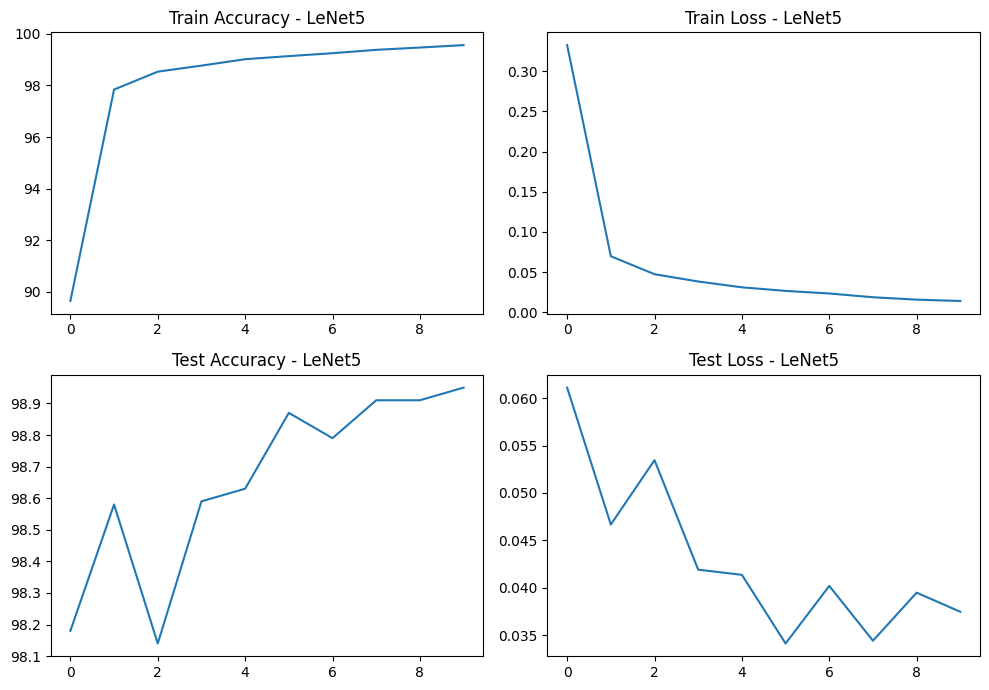

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

axs[0, 0].plot(train_acc_lenet5)
axs[0, 0].set_title('Train Accuracy - LeNet5')

axs[0, 1].plot(train_loss_lenet5)
axs[0, 1].set_title('Train Loss - LeNet5')

axs[1, 0].plot(test_acc_lenet5)
axs[1, 0].set_title('Test Accuracy - LeNet5')

axs[1, 1].plot(test_loss_lenet5)
axs[1, 1].set_title('Test Loss - LeNet5')

plt.tight_layout()
plt.show()



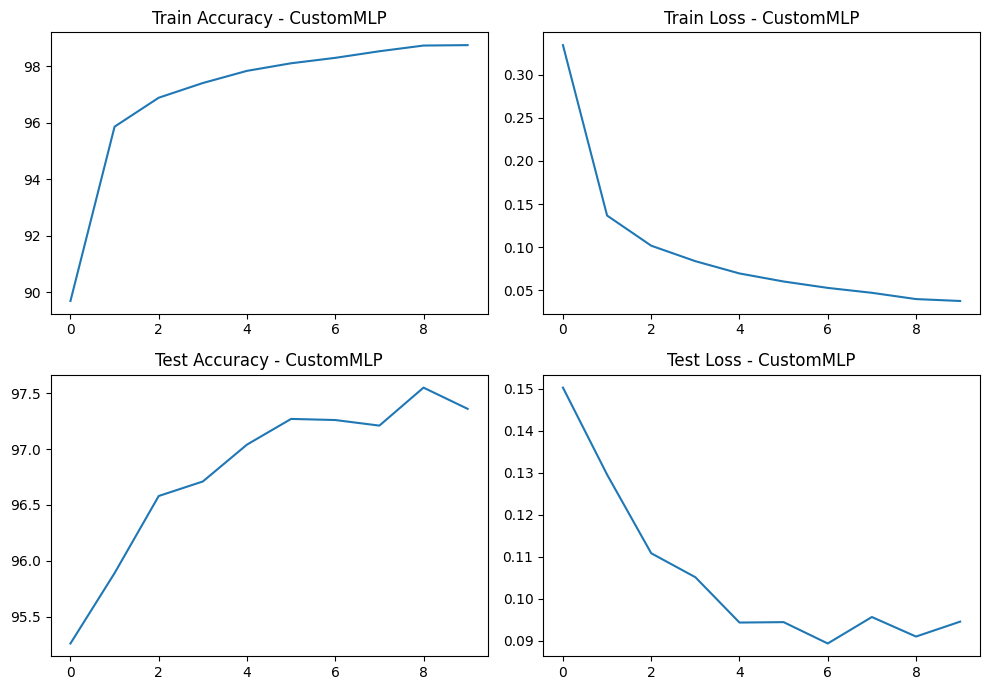

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

axs[0, 0].plot(train_acc_custommlp)
axs[0, 0].set_title('Train Accuracy - CustomMLP')

axs[0, 1].plot(train_loss_custommlp)
axs[0, 1].set_title('Train Loss - CustomMLP')

axs[1, 0].plot(test_acc_custommlp)
axs[1, 0].set_title('Test Accuracy - CustomMLP')

axs[1, 1].plot(test_loss_custommlp)
axs[1, 1].set_title('Test Loss - CustomMLP')

plt.tight_layout()
plt.show()



# Question 5
## Compare the predictive performances of LeNet-5 and your custom MLP. 
## Also, make sure that the accuracy of LeNet-5 (your implementation) is similar to the known accuracy.

In [50]:
print(f'Best Accuracy (LeNet5): {np.max(test_acc_lenet5)}')
print(f'Best Accuracy (CustomMLP): {np.max(test_acc_custommlp)}')

Best Accuracy (LeNet5): 98.95
Best Accuracy (CustomMLP): 97.55


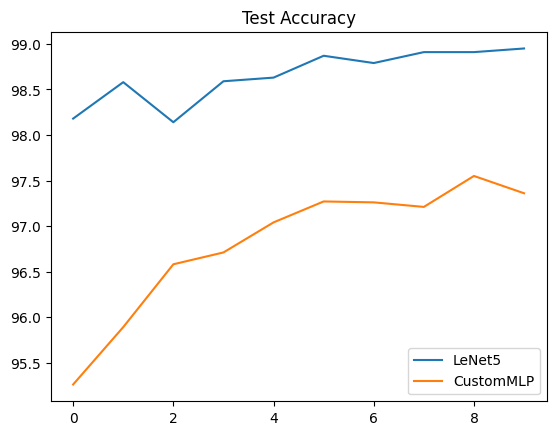

In [51]:
plt.plot(test_acc_lenet5, label='LeNet5')
plt.plot(test_acc_custommlp, label='CustomMLP')
plt.legend()
plt.title('Test Accuracy')
plt.show()

Apparently, LeNet-5 achieves a well-known accuracy level of about 98.5% to 99% on the MNIST dataset when trained and tested under standard conditions.
Hence, the result of my implementation is similar to the known accuracy.

# Question 6
## Employ at least more than two regularization techniques to improve LeNet-5 model. 
## You can use whatever techniques if you think they may be helpful to improve the performance. 
## Verify that they actually help improve the performance. 
## Keep in mind that when you employ the data augmentation technique, it should be applied only to training data. 
## So, the modification of provided MNIST class in dataset.py may be needed.

### Applied batch normalization and dropout technique LeNet5 (LeNet5_v2)

In [52]:
class LeNet5_v2(nn.Module):
    def __init__(self):
        super(LeNet5_v2, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv1_bn = nn.BatchNorm2d(6)  
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.conv2_bn = nn.BatchNorm2d(16) 
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc1_drop = nn.Dropout(0.5)  
        self.fc2 = nn.Linear(120, 84)
        self.fc2_drop = nn.Dropout(0.5)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1_bn(self.conv1(x))))
        x = self.pool(F.relu(self.conv2_bn(self.conv2(x))))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1_drop(self.fc1(x)))
        x = F.relu(self.fc2_drop(self.fc2(x)))
        output = self.fc3(x)
        return output


In [53]:
train_acc_lenet5_v2 = np.load('./results/lenet5_v2/train_acc_hist.npy').tolist()
train_loss_lenet5_v2 = np.load('./results/lenet5_v2/train_loss_hist.npy').tolist()
test_acc_lenet5_v2 = np.load('./results/lenet5_v2/test_acc_hist.npy').tolist()
test_loss_lenet5_v2 = np.load('./results/lenet5_v2/test_loss_hist.npy').tolist()

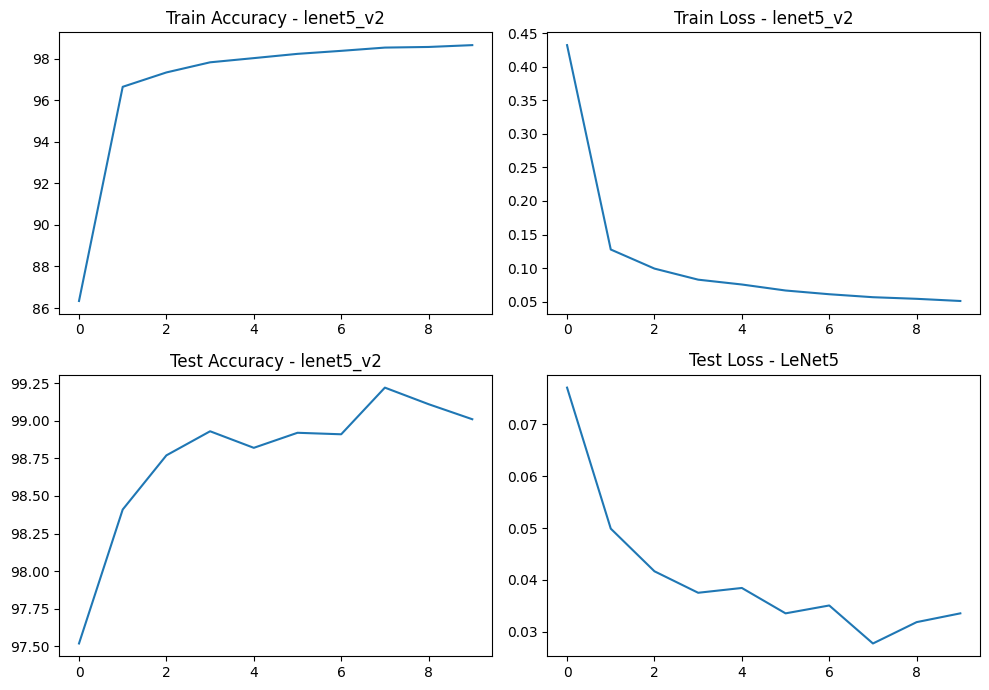

In [54]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

axs[0, 0].plot(train_acc_lenet5_v2)
axs[0, 0].set_title('Train Accuracy - lenet5_v2')

axs[0, 1].plot(train_loss_lenet5_v2)
axs[0, 1].set_title('Train Loss - lenet5_v2')

axs[1, 0].plot(test_acc_lenet5_v2)
axs[1, 0].set_title('Test Accuracy - lenet5_v2')

axs[1, 1].plot(test_loss_lenet5_v2)
axs[1, 1].set_title('Test Loss - LeNet5')

plt.tight_layout()
plt.show()



### Compare test accuracy among LeNet5, LeNet5_v2, and CustomMLP

In [55]:
print(f'Best Accuracy (LeNet5): {np.max(test_acc_lenet5)}')
print(f'Best Accuracy (LeNet5_v2): {np.max(test_acc_lenet5_v2)}')
print(f'Best Accuracy (CustomMLP): {np.max(test_acc_custommlp)}')

Best Accuracy (LeNet5): 98.95
Best Accuracy (LeNet5_v2): 99.22
Best Accuracy (CustomMLP): 97.55


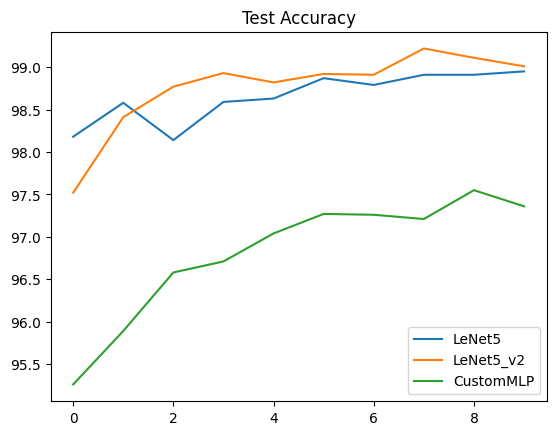

In [56]:
plt.plot(test_acc_lenet5, label='LeNet5')
plt.plot(test_acc_lenet5_v2, label='LeNet5_v2')
plt.plot(test_acc_custommlp, label='CustomMLP')
plt.legend()
plt.title('Test Accuracy')
plt.show()

### Compare train accuracy among LeNet5, LeNet5_v2, and CustomMLP

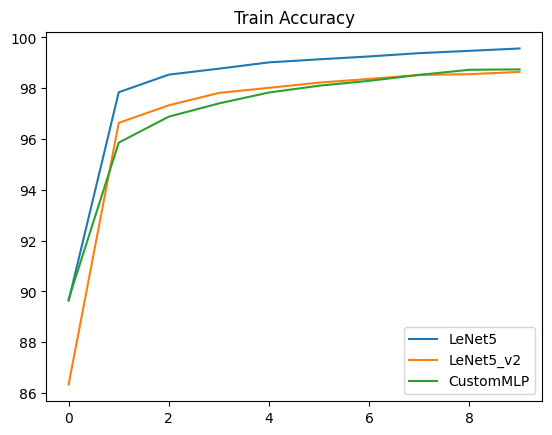

In [58]:
plt.plot(train_acc_lenet5, label='LeNet5')
plt.plot(train_acc_lenet5_v2, label='LeNet5_v2')
plt.plot(train_acc_custommlp, label='CustomMLP')
plt.legend()
plt.title('Train Accuracy')
plt.show()

Applying batch normalization and dropout regularization techniques can help alleviate overfitting by improving the model's ability to generalize to unseen data. 

As a result, it may lead to a decrease in training accuracy, however, it often results in an increase in testing accuracy, indicating improved generalization performance.